<a href="https://colab.research.google.com/github/Yogananth-r/Breast-Cancer-Prediction-Using-Neural-Network-in-R./blob/main/Breast_Cancer_Prediction_Using_Neural_Network_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and enable the packages needed!

In [4]:
install.packages('mlbench')
install.packages('deepnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(mlbench)
library(deepnet)

The dataset of BreastCancer is available in mlbench package.

In [6]:
data("BreastCancer")

In [8]:
head(BreastCancer)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant


Cleaning of rows with missing data

In [9]:
BreastCancer = BreastCancer[which(complete.cases(BreastCancer)==TRUE),]

In [10]:
BreastCancer

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant
7,1018099,1,1,1,1,2,10,3,1,1,benign
8,1018561,2,1,2,1,2,1,3,1,1,benign
9,1033078,2,1,1,1,2,1,1,1,5,benign


The dataset has over 700 records of cells labelled as benign or malignant

Getting the attributes

In [11]:
names(BreastCancer)

[1] "Id"              "Cl.thickness"    "Cell.size"       "Cell.shape"     
 [5] "Marg.adhesion"   "Epith.c.size"    "Bare.nuclei"     "Bl.cromatin"    
 [9] "Normal.nucleoli" "Mitoses"         "Class"

Creating a set of features for independent variables and creating dependent variable. Converting the categorical values "benign","malignant" to numeric value.

In [13]:
y= as.matrix(BreastCancer[,11])
y[which(y=="benign")]=0
y[which(y=="malignant")]=1
y= as.numeric(y)
x=as.numeric(as.matrix(BreastCancer[,2:10]))
x=matrix(as.numeric(x),ncol=9)

We use nn from deepnet package to train the model of neural network!

In [34]:
nn <- nn.train(x,y, hidden=c(5))
yy = nn.predict(nn,x)
print(head(yy))
yhat=matrix(0,length(yy),1)
yhat[which(yy > mean(yy))]=1
yhat[which(yy <= mean(yy))]=0

          [,1]
[1,] 0.2926925
[2,] 0.4573476
[3,] 0.3045090
[4,] 0.4740007
[5,] 0.2973112
[6,] 0.5006271


Plotting the confusion matrix to check the accuracy of the model!

In [35]:
cm=table(y,yhat)
print(cm)
print("Accuracy =")
print(sum(diag(cm))/sum(cm))*100

   yhat
y     0   1
  0 423  21
  1   4 235
[1] "Accuracy ="
[1] 0.9633968


[1] 96.33968

The accuracy is about 96% and we are visualizing the confusion matrix!

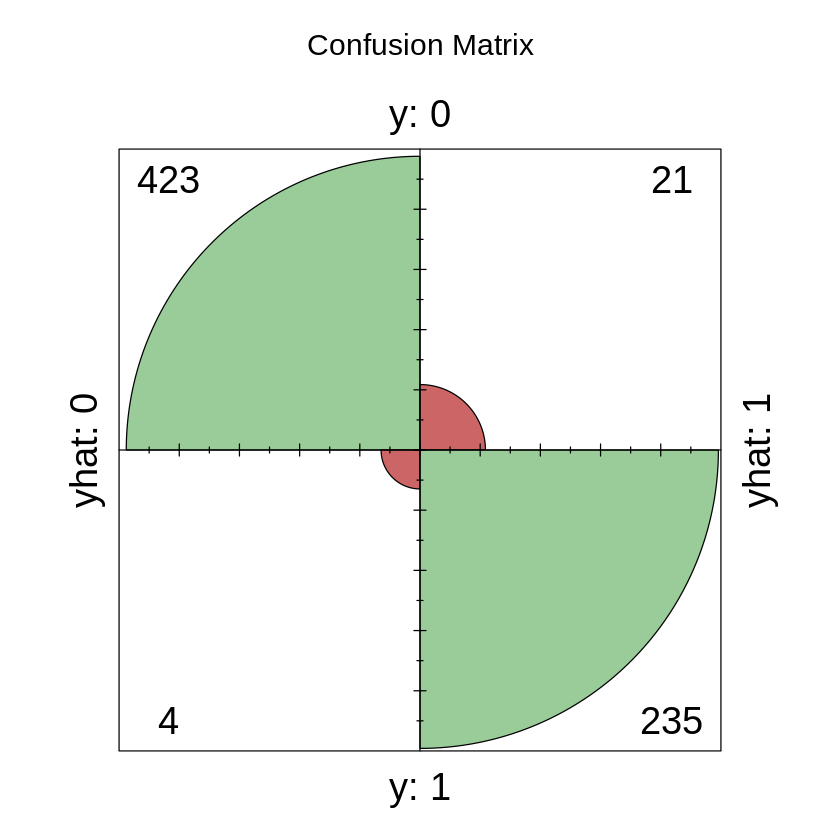

In [36]:
ctable <- as.table(cm, nrow = 2, byrow = TRUE)
fourfoldplot(ctable, color = c("#CC6666", "#99CC99"),conf.level = 0, margin = 1, main = "Confusion Matrix")